# Health Insurance Coverage

## Coverage rates before and after the Affordable Care Act

## Plot 'Uninsured Rate Change (2010-2015)' on a map

In [27]:
import numpy as np
import pandas as pd

In [28]:
# ==========================================================================
# The original dataset has text fields where numeric or boolean are required
# ==========================================================================

raw_cols = ['State',
 'Uninsured Rate (2010)',
 'Uninsured Rate (2015)',
 'Uninsured Rate Change (2010-2015)',
 'Health Insurance Coverage Change (2010-2015)',
 'Employer Health Insurance Coverage (2015)',
 'Marketplace Health Insurance Coverage (2016)',
 'Marketplace Tax Credits (2016)',
 'Average Monthly Tax Credit (2016)',
 'State Medicaid Expansion (2016)',
 'Medicaid Enrollment (2013)',
 'Medicaid Enrollment (2016)',
 'Medicaid Enrollment Change (2013-2016)',
 'Medicare Enrollment (2016)']

# custom function taken from http://stackoverflow.com/questions/12432663/
#                            what-is-a-clean-way-to-convert-a-string-percent-to-a-float
def p2f(x):
    '''convert string percent to float'''
    return float(x.strip('%'))/100
def d2f(x):
    '''convert dollar to float'''
    return float(x.strip('$'))
def t2b(x):
    '''convert text to boolean'''
    return True if x == "True" else False

state_coverage = pd.read_csv(filepath_or_buffer="../input/states.csv",
                            converters={'Uninsured Rate (2010)':p2f,
                                        'Uninsured Rate (2015)':p2f,
                                        'Average Monthly Tax Credit (2016)':d2f,
                                        'State Medicaid Expansion (2016)':t2b})

state_coverage['Uninsured Rate Change (2010-2015)'] = state_coverage.iloc[:,2]-state_coverage.iloc[:,1]

state_coverage.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,0.146,0.101,-0.045,215000,2545000,165534,152206,310.0,False,799176.0,910775,111599.0,989855
1,Alaska,0.199,0.149,-0.050,36000,390000,17995,16205,750.0,True,122334.0,166625,44291.0,88966
2,Arizona,0.169,0.108,-0.061,410000,3288000,179445,124346,230.0,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,0.175,0.095,-0.080,234000,1365000,63357,56843,306.0,True,556851.0,920194,363343.0,606146
4,California,0.185,0.086,-0.099,3826000,19552000,1415428,1239893,309.0,True,7755381.0,11843081,4087700.0,5829777


In [40]:
# create a color gradient for 'Uninsured Rate Change (2010-2015)'

from colour import Color
red    = Color("blue")
colors = list(red.range_to(Color("red"),6))

bins   = np.histogram(state_coverage['Uninsured Rate Change (2010-2015)'].values, 5)[1]

In [41]:
def find_color(bins,value,colors):
    '''return the rgb representation of the bin a value belongs to'''
    idx = (np.abs(bins-value)).argmin()
    return colors[idx].rgb

In [42]:
states = state_coverage['State'].values.tolist()
states.remove('United States')
values = state_coverage['Uninsured Rate Change (2010-2015)'].values.tolist()

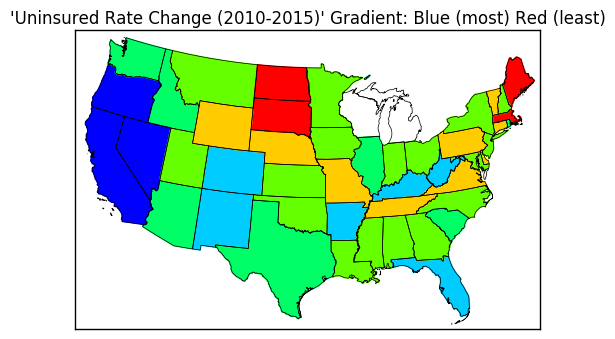

In [44]:
# create a map showing 'Uninsured Rate Change (2010-2015)' as a gradient

# citation:
# https://stackoverflow.com/questions/7586384/color-states-with-pythons-matplotlib-basemap

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
%matplotlib inline

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance


# get state and draw the filled polygon
for state,value in zip(states,values):
    seg    = map.states[state_names.index(state.strip())]
    color  = find_color(bins,value,colors)
    poly   = Polygon(seg, facecolor=color,edgecolor=color)
    ax.add_patch(poly)

plt.title("'Uninsured Rate Change (2010-2015)' Gradient: Blue (most) Red (least)")
plt.show()